In [110]:
#Importing all the libraries

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [115]:
#Loading CIFAR 10 dataset 

In [116]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [117]:
#Print shape train and test sets 

In [125]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:' ,X_test.shape)
print('Shape of y_test:' ,y_test.shape)

Shape of X_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of X_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)


In [138]:
#Creating classes list

In [139]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [143]:
#Reshape y_train to one 1d array

In [144]:
y_train = y_train.reshape(-1,)

In [145]:
# create a function to plot the image of datasets

In [158]:
def image_plot(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    

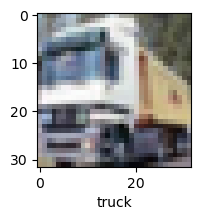

In [160]:
image_plot(X_train,y_train,1)

In [162]:
#Normalize the dataset by divivding it 255

In [163]:
X_train = X_train/255
X_test = X_test/255

In [164]:
# creating ANN model 

In [169]:
ann  = keras.Sequential([
       keras.layers.Flatten(input_shape=(32,32,3)),
       keras.layers.Dense(300,activation='relu'),
       keras.layers.Dense(100,activation='relu'),
       keras.layers.Dense(10,activation='sigmoid')
])

In [170]:
ann.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']    )

In [171]:
ann.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 1.8653 - accuracy: 0.3276
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6830 - accuracy: 0.3995
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6030 - accuracy: 0.4279
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5528 - accuracy: 0.4429
Epoch 5/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5144 - accuracy: 0.4597
Epoch 6/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4881 - accuracy: 0.4706
Epoch 7/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4615 - accuracy: 0.4813
Epoch 8/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4428 - accuracy: 0.4843
Epoch 9/10
1563/1563 [==============================] - 15s 9ms/step - loss: 1.4273 - accuracy: 0.4918
Epoch 10/10
1563/1563 [==============================] - 15s 9ms/ste

In [174]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 1.5196 - accuracy: 0.4667


[1.519553303718567, 0.4666999876499176]

In [176]:
y_pred = ann.predict(X_test)

313/313 [==============================] - 0s 968us/step


In [180]:
y_pred_classes = [np.argmax(elements) for elements in y_pred]

In [184]:
print('classification report: \n', classification_report(y_test,y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.52      0.55      0.54      1000
           1       0.44      0.72      0.55      1000
           2       0.40      0.22      0.28      1000
           3       0.37      0.24      0.29      1000
           4       0.42      0.46      0.44      1000
           5       0.47      0.24      0.32      1000
           6       0.49      0.56      0.52      1000
           7       0.55      0.44      0.49      1000
           8       0.49      0.72      0.58      1000
           9       0.46      0.52      0.49      1000

    accuracy                           0.47     10000
   macro avg       0.46      0.47      0.45     10000
weighted avg       0.46      0.47      0.45     10000



In [173]:
# Building CNN Model

In [196]:
CNN  = keras.Sequential([
       keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
       keras.layers.MaxPool2D(pool_size=(2,2)),
       keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),
       keras.layers.MaxPool2D(pool_size=(2,2)),
    
      #ANN
       keras.layers.Flatten(input_shape=(32,32,3)),
       keras.layers.Dense(300,activation='relu'),
       keras.layers.Dense(100,activation='relu'),
       keras.layers.Dense(10,activation='softmax')
])

In [197]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']    )

In [199]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 0.6041 - accuracy: 0.7887
Epoch 2/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5743 - accuracy: 0.7991
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5521 - accuracy: 0.8076
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5277 - accuracy: 0.8140
Epoch 5/10
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5041 - accuracy: 0.8223
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.4789 - accuracy: 0.8318
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4595 - accuracy: 0.8372
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4444 - accuracy: 0.8414
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.4169 - accuracy: 0.8528
Epoch 10/10
1563/1563 [==============================] - 20s 13m

In [200]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1727 - accuracy: 0.6825


[1.1727100610733032, 0.6825000047683716]

In [201]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [208]:
y_pred[:5]

array([[3.00767697e-05, 2.53335311e-05, 4.10349385e-05, 9.72436666e-01,
        7.95086453e-05, 2.61480156e-02, 5.88975905e-04, 1.63520028e-07,
        6.00768311e-04, 4.95718014e-05],
       [1.75338664e-05, 2.29688510e-02, 2.03305532e-08, 1.06657438e-07,
        6.59963620e-12, 5.12003506e-09, 1.03060775e-10, 1.70294862e-10,
        9.69782948e-01, 7.23052397e-03],
       [2.13645468e-03, 1.09438330e-01, 3.44813860e-04, 1.39531307e-02,
        3.13532003e-03, 2.14948528e-03, 1.73724012e-03, 1.79604085e-05,
        1.62763134e-01, 7.04324126e-01],
       [8.71522427e-01, 3.06536350e-03, 2.37540007e-02, 4.94043285e-04,
        1.10643719e-04, 1.23680902e-05, 6.22192922e-04, 1.04940789e-07,
        1.00411393e-01, 7.47495324e-06],
       [1.10923878e-07, 5.31160413e-06, 3.13256332e-03, 3.48005514e-03,
        5.35107195e-01, 1.16829888e-03, 4.57095116e-01, 6.33044147e-06,
        4.87720126e-06, 1.32345903e-07]], dtype=float32)

In [203]:
y_classes = [np.argmax(elements) for elements in y_pred]

In [204]:
y_classes[0]

3

In [206]:
y_test = y_test.reshape(-1,)

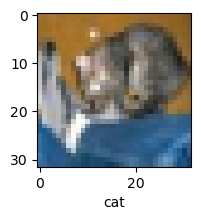

In [207]:
image_plot(X_test,y_test,0)

In [211]:
y_classes[:10]

[3, 8, 9, 0, 4, 6, 1, 6, 3, 1]

In [212]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [214]:
print('classification report: \n', classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.73      0.65      0.69      1000
           1       0.85      0.75      0.80      1000
           2       0.52      0.67      0.58      1000
           3       0.52      0.48      0.50      1000
           4       0.67      0.59      0.63      1000
           5       0.61      0.56      0.58      1000
           6       0.72      0.80      0.76      1000
           7       0.83      0.67      0.74      1000
           8       0.71      0.85      0.78      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

